# Getmapping AOI-Clipped 12.5cm Base Resolution

Getmapping AOI-Clipped 12.5cm Base Resolution provides RGB aerial imagery of Great Britain with a GSD of 12.5 cm.
The archive has been collected from 2000 to today. The imagery is retrieved using Web Map Tile Services (WMTS).

In the example, the workflow, the area of interest and the workflow parameters are defined. After running the job, the results are downloaded and visualized. For more information, refer to the block's [UP42 Marketplace page](https://marketplace.up42.com/block/f2acfa3c-bcf9-49d6-a7b8-79b122890987).

In [1]:
import up42

In [2]:
up42.authenticate(project_id="1234", 
                  project_api_key="abcd")
project = up42.initialize_project()

2021-03-11 11:00:21,155 - Authentication with UP42 successful!
2021-03-11 11:00:21,837 - Initialized Project(name: getmapping, project_id: 791282e3-e415-423d-9ef9-2b04ca951a92, description: , createdAt: 2021-03-11T09:12:45.019551Z)


In [3]:
# Construct workflow
workflow = project.create_workflow(name="Getmapping-example", use_existing=True)
input_tasks = ["Getmapping AOI-Clipped 12.5cm Base Resolution"]
workflow.add_workflow_tasks(input_tasks)

2021-03-11 11:00:32,675 - Getting existing workflows in project ...
2021-03-11 11:00:33,014 - Got 2 workflows for project 791282e3-e415-423d-9ef9-2b04ca951a92.
100%|██████████| 2/2 [00:00<00:00,  3.05it/s]
2021-03-11 11:00:33,689 - Using existing workflow: Getmapping-example - aaf6832f-4dd6-4a16-8d76-4c1e374fb7ea
2021-03-11 11:00:37,431 - Added tasks to workflow: [{'name': 'gm-wmts-125mm:1', 'parentName': None, 'blockId': 'f2acfa3c-bcf9-49d6-a7b8-79b122890987'}]


In [4]:
uk_example_aoi = {
  "type": "FeatureCollection","features": [{"type": "Feature","properties": {},
    "geometry": {"type": "Polygon","coordinates": [
          [[-0.077623,51.490115],
           [-0.073857,51.4895],
           [-0.073643,51.487236],
           [-0.078084,51.487049],
           [-0.077623,51.490115]]]}}]}

In [5]:
# Define the aoi and input parameters of the workflow to run it.
input_parameters = workflow.construct_parameters(geometry=uk_example_aoi, geometry_operation="intersects")

In [6]:
# Price estimation
workflow.estimate_job(input_parameters)

2021-03-11 11:01:06,976 - Estimated: 262-274 Credits, Duration: 0-0 min.


{'gm-wmts-125mm:1': {'blockConsumption': {'resources': {'unit': 'SQUARE_KM',
    'min': 0.086978,
    'max': 0.090904},
   'credit': {'min': 261, 'max': 273}},
  'machineConsumption': {'duration': {'min': 0, 'max': 0},
   'credit': {'min': 1, 'max': 1}}}}

In [7]:
# Run a test job to query data availability and check the configuration.
test_job = workflow.test_job(input_parameters, track_status=True)

2021-03-11 11:01:09,108 - +++++++++++++++++++++++++++++++++
2021-03-11 11:01:09,109 - Running this job as Test Query...
2021-03-11 11:01:09,110 - +++++++++++++++++++++++++++++++++
2021-03-11 11:01:09,111 - Selected input_parameters: {'gm-wmts-125mm:1': {'zoom_level': 20, 'imagery_layers': ['BestAvailable_UK_125mm'], 'intersects': {'type': 'Polygon', 'coordinates': (((-0.077623, 51.490115), (-0.073857, 51.4895), (-0.073643, 51.487236), (-0.078084, 51.487049), (-0.077623, 51.490115)),)}}, 'config': {'mode': 'DRY_RUN'}}
2021-03-11 11:01:10,249 - Created and running new job: d24d511f-b741-4585-a480-bfda7f127226.
2021-03-11 11:01:10,591 - Tracking job status continuously, reporting every 30 seconds...
2021-03-11 11:01:43,080 - Job is PENDING! - d24d511f-b741-4585-a480-bfda7f127226
2021-03-11 11:02:15,122 - Job finished successfully! - d24d511f-b741-4585-a480-bfda7f127226


In [8]:
# Run the actual job.
job = workflow.run_job(input_parameters, track_status=True)

2021-03-11 11:02:22,245 - Selected input_parameters: {'gm-wmts-125mm:1': {'zoom_level': 20, 'imagery_layers': ['BestAvailable_UK_125mm'], 'intersects': {'type': 'Polygon', 'coordinates': (((-0.077623, 51.490115), (-0.073857, 51.4895), (-0.073643, 51.487236), (-0.078084, 51.487049), (-0.077623, 51.490115)),)}}}
2021-03-11 11:02:26,465 - Created and running new job: d8ac1858-6fa7-499b-a425-ef2c2fe034f8.
2021-03-11 11:02:26,822 - Tracking job status continuously, reporting every 30 seconds...
2021-03-11 11:02:59,186 - Job is PENDING! - d8ac1858-6fa7-499b-a425-ef2c2fe034f8
2021-03-11 11:03:31,231 - Job is RUNNING! - d8ac1858-6fa7-499b-a425-ef2c2fe034f8
2021-03-11 11:03:57,945 - Job finished successfully! - d8ac1858-6fa7-499b-a425-ef2c2fe034f8


In [ ]:
# Download the results
job.download_results()

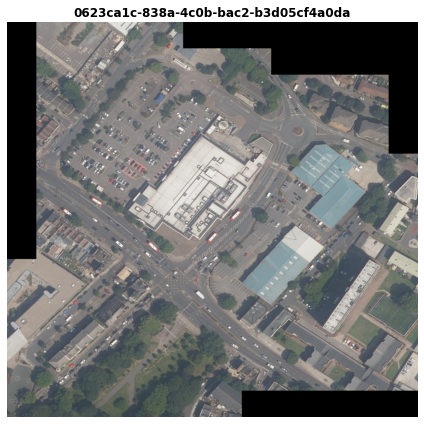

In [10]:
job.plot_results(figsize=(6,6))